In [5]:
pip install catboost

  Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)


In [8]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import statsmodels.api as sm

# Создаем придуманные данные о недвижимости
data = {
    'Площадь': np.random.uniform(50, 200, 1000),
    'Количество спален': np.random.randint(1, 5, 1000),
    'Расстояние до центра': np.random.uniform(1, 20, 1000),
    'Этаж': np.random.randint(1, 15, 1000),
    'Год постройки': np.random.randint(1980, 2022, 1000),
    'Цена': np.random.uniform(50000, 500000, 1000)
}

# Создаем DataFrame с данными
df = pd.DataFrame(data)

# Разделяем данные на признаки и целевую переменную
X = df.drop('Цена', axis=1)
y = df['Цена']

# Обучаем модель CatBoost для прогнозирования цен
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1)
catboost_model.fit(X, y)

# Делаем прогнозы с использованием модели CatBoost
predictions_catboost = catboost_model.predict(X)

# Используем модель GLM для анализа связей между признаками и ценой
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Выводим статистику модели GLM
print(glm_model.summary())

# Пример прогнозирования цен с использованием модели GLM
predictions_glm = glm_model.predict(X)

# Выводим первые 5 прогнозов и фактические цены
print("Прогнозы GLM:")
print(predictions_glm[:5])
print("Фактические цены:")
print(y[:5])


0:	learn: 130201.8943078	total: 11.2ms	remaining: 1.1s
1:	learn: 129818.9340601	total: 15.5ms	remaining: 759ms
2:	learn: 129276.3757062	total: 19.4ms	remaining: 627ms
3:	learn: 128731.1355540	total: 21.9ms	remaining: 525ms
4:	learn: 128216.8983577	total: 23.8ms	remaining: 452ms
5:	learn: 127572.1404339	total: 24.9ms	remaining: 390ms
6:	learn: 127433.7817236	total: 27.1ms	remaining: 360ms
7:	learn: 127163.4113591	total: 29.2ms	remaining: 336ms
8:	learn: 126927.6400177	total: 32.7ms	remaining: 331ms
9:	learn: 126593.4946814	total: 35.4ms	remaining: 318ms
10:	learn: 126267.7347778	total: 40ms	remaining: 324ms
11:	learn: 125942.4790273	total: 42.8ms	remaining: 314ms
12:	learn: 125586.3262611	total: 55.5ms	remaining: 372ms
13:	learn: 125396.3076777	total: 62.7ms	remaining: 385ms
14:	learn: 125021.5906951	total: 65ms	remaining: 368ms
15:	learn: 124695.9858406	total: 70.7ms	remaining: 371ms
16:	learn: 124335.2809363	total: 79.6ms	remaining: 388ms
17:	learn: 123774.4469258	total: 81.1ms	remain

In [9]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы (например, 80% для обучения и 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели CatBoost на обучающем наборе
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1)
catboost_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
predictions_catboost = catboost_model.predict(X_test)

# Оценка производительности модели на тестовом наборе
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions_catboost)
print(f"RMSE (корень из средней квадратичной ошибки): {np.sqrt(mse)}")


0:	learn: 129089.8735525	total: 1.55ms	remaining: 154ms
1:	learn: 128665.0424696	total: 11.7ms	remaining: 574ms
2:	learn: 128200.8009071	total: 15ms	remaining: 486ms
3:	learn: 127799.7582760	total: 18.6ms	remaining: 446ms
4:	learn: 127169.9039506	total: 22.4ms	remaining: 426ms
5:	learn: 126853.5716346	total: 25.8ms	remaining: 404ms
6:	learn: 126625.5945183	total: 29.6ms	remaining: 394ms
7:	learn: 126295.0440787	total: 31.9ms	remaining: 367ms
8:	learn: 126027.8837671	total: 35.1ms	remaining: 355ms
9:	learn: 125634.7092907	total: 38.1ms	remaining: 343ms
10:	learn: 125290.3177642	total: 40.9ms	remaining: 331ms
11:	learn: 124749.5507545	total: 44.2ms	remaining: 324ms
12:	learn: 124232.2345048	total: 47.3ms	remaining: 316ms
13:	learn: 124080.5989340	total: 50.1ms	remaining: 308ms
14:	learn: 123643.5194233	total: 57.2ms	remaining: 324ms
15:	learn: 123205.2556329	total: 60.2ms	remaining: 316ms
16:	learn: 122746.4430083	total: 63.6ms	remaining: 310ms
17:	learn: 122384.8923353	total: 66.6ms	rem

<ipython-input-10-b62a5144727d>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Идеальная линия')


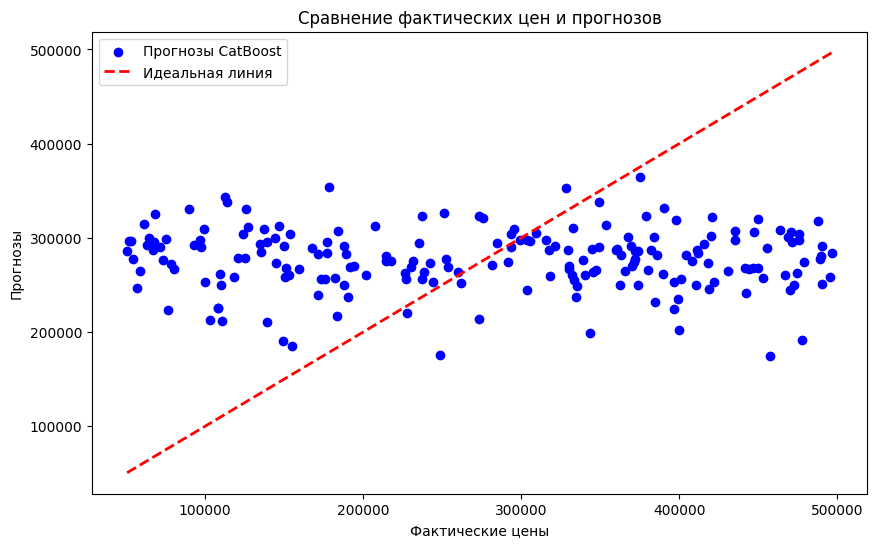

In [10]:
import matplotlib.pyplot as plt

# Визуализация прогнозов и фактических цен
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_catboost, c='blue', label='Прогнозы CatBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Идеальная линия')
plt.xlabel('Фактические цены')
plt.ylabel('Прогнозы')
plt.title('Сравнение фактических цен и прогнозов')
plt.legend()
plt.show()
